# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [72]:
cities = []

for x in range(0, 1500):
    
    # Generate random numbers for latitude and longitude
    lat = random.randrange(-90, 90, 1)
    lng = random.randrange(-180, 180, 1)
    
    # Grab closest city to coordinates
    city = citipy.nearest_city(lat, lng)
    city_name = city.city_name
    
    # Add to list of cities
    cities.append(city_name)

# Convert to pandas series
cities = pd.Series(cities)

# Get rid of duplicates
cities = cities.unique()

# Print length of cities list
print(len(cities))

592


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="

In [155]:
# Create empty lists to store information
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Storing data for {city}')
        
        
    except (KeyError, IndexError):
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        print("City not found... skipping.")

Storing data for agogo
City not found... skipping.
City not found... skipping.
Storing data for sao joao da barra
Storing data for dire dawa
Storing data for ushuaia
Storing data for abu samrah
Storing data for sangar
Storing data for rikitea
Storing data for longyearbyen
Storing data for pitimbu
Storing data for atar
Storing data for yellowknife
City not found... skipping.
Storing data for lumsden
Storing data for east london
Storing data for lufilufi
Storing data for busselton
Storing data for villanueva
Storing data for adrar
Storing data for mataura
Storing data for cervo
Storing data for hobart
Storing data for khatanga
Storing data for rio gallegos
Storing data for san carlos de bariloche
Storing data for thompson
Storing data for arlit
City not found... skipping.
Storing data for barra do garcas
Storing data for shingu
City not found... skipping.
Storing data for bluff
Storing data for jamestown
Storing data for new norfolk
Storing data for prince rupert
Storing data for pathein

Storing data for labuhan
Storing data for casablanca
Storing data for torbay
Storing data for tiarei
Storing data for palmer
Storing data for bar-le-duc
Storing data for accra
Storing data for sistranda
Storing data for havre-saint-pierre
Storing data for acapulco
Storing data for beloha
Storing data for fortuna
Storing data for skorodnoye
City not found... skipping.
Storing data for ucluelet
Storing data for merke
Storing data for thayetmyo
Storing data for moba
Storing data for diofior
Storing data for tongling
Storing data for manakara
Storing data for haimen
Storing data for ulaanbaatar
City not found... skipping.
City not found... skipping.
City not found... skipping.
Storing data for griffith
Storing data for luwuk
Storing data for kahului
Storing data for constitucion
Storing data for lakes entrance
City not found... skipping.
Storing data for pavilosta
City not found... skipping.
Storing data for bitung
Storing data for maputo
Storing data for kenai
Storing data for kamenka
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# Create dictionary to store information
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Create dataframe
weather_data = pd.DataFrame(weather_dict)

# Drop NaN values
weather_data = weather_data.dropna()

# Reset Index
weather_data = weather_data.reset_index(drop=True)

# Export to csv file
weather_data.to_csv("output_data/city_weather.csv")

# Display dataframe
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agogo,6.8000,-1.0819,69.44,97.0,99.0,3.69,GH,1.619307e+09
1,sao joao da barra,-21.6403,-41.0511,71.76,84.0,10.0,3.51,BR,1.619307e+09
2,dire dawa,9.5931,41.8661,70.18,70.0,37.0,11.21,ET,1.619307e+09
3,ushuaia,-54.8000,-68.3000,50.00,57.0,40.0,9.22,AR,1.619307e+09
4,abu samrah,35.3029,37.1841,71.19,38.0,66.0,3.44,SY,1.619307e+09
...,...,...,...,...,...,...,...,...,...
529,sabang,5.8933,95.3214,82.60,71.0,100.0,14.54,ID,1.619308e+09
530,gillette,44.2911,-105.5022,55.99,50.0,90.0,17.27,US,1.619308e+09
531,grindavik,63.8424,-22.4338,44.60,100.0,90.0,19.57,IS,1.619308e+09
532,tres arroyos,-38.3739,-60.2798,55.80,70.0,46.0,9.44,AR,1.619308e+09


In [89]:
# Display summary statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,22.154077,12.939577,59.762640,68.468165,53.172285,7.718933,1.619307e+09
std,32.792776,91.614500,18.165531,23.130876,37.658487,5.216768,9.390092e+01
min,-54.800000,-175.200000,2.550000,5.000000,0.000000,0.160000,1.619307e+09
25%,-4.000125,-67.687025,45.422500,54.000000,18.500000,3.675000,1.619307e+09
50%,29.878950,17.982500,60.955000,75.000000,59.500000,6.870000,1.619307e+09
75%,48.724975,94.237475,76.530000,86.000000,90.000000,10.705000,1.619308e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,28.770000,1.619308e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

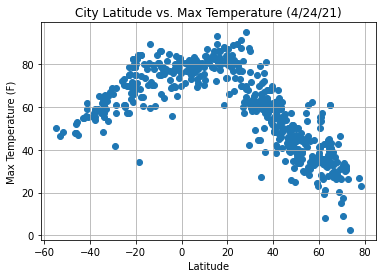

In [150]:
# Store x and y variables for scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Max Temp"]

# Create scatter plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.grid(True)
plt.savefig('output_data/lat_vs_temp.png', facecolor='w', edgecolor='w')
plt.show()

In [ ]:
# The plot above shows that there is correlation between latitude and temperature which is what we expected.

## Latitude vs. Humidity Plot

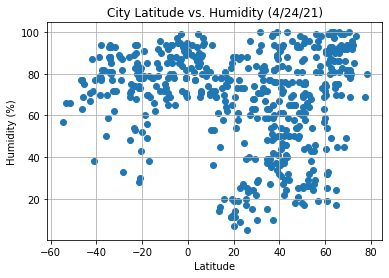

In [151]:
# Store x and y variables for scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Humidity"]

# Create scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.grid(True)
plt.savefig('output_data/lat_vs_humid.png', facecolor='w', edgecolor='w')
plt.show()

In [ ]:
# The plot above shows that there is not a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

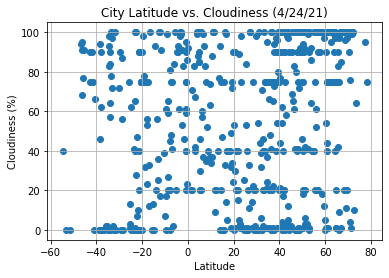

In [152]:
# Store x and y variables for scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Cloudiness"]

# Create scatter plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.grid(True)
plt.savefig('output_data/lat_vs_cloud.png', facecolor='w', edgecolor='w')
plt.show()

In [ ]:
# The plot above shows that there is not a correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

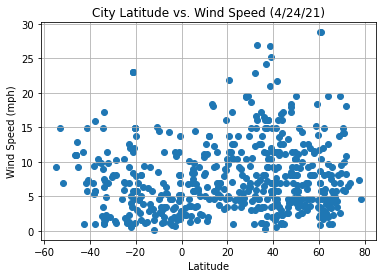

In [153]:
# Store x and y variables for scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Wind Speed"]

# Create scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.grid(True)
plt.savefig('output_data/lat_vs_wind.png', facecolor='w', edgecolor='w')
plt.show()

In [ ]:
# The plot above shows that there is not a correlation between latitude and wind speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

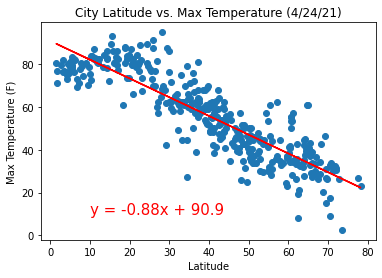

The r^2 value is 0.7670287275885654


In [125]:
# Store x and y variables
weather_data_north = weather_data[weather_data["Lat"] > 0]
x_axis = weather_data_north["Lat"]
y_axis = weather_data_north["Max Temp"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (10,10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a strong correlation between latitude and temperature in the northern hemisphere. The r^2 value displays this.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

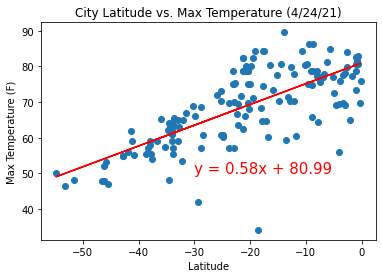

The r^2 value is 0.5346422707756301


In [128]:
# Store x and y variables
weather_data_south = weather_data[weather_data["Lat"] < 0]
x_axis = weather_data_south["Lat"]
y_axis = weather_data_south["Max Temp"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-30,50), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a strong correlation between latitude and temperature in the southern hemisphere. The r^2 value displays this.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

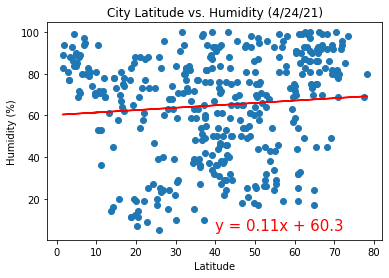

The r^2 value is 0.007653183689825376


In [132]:
# Store x and y variables
weather_data_north = weather_data[weather_data["Lat"] > 0]
x_axis = weather_data_north["Lat"]
y_axis = weather_data_north["Humidity"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (40,5), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and humidity in the northern hemisphere. The r^2 value displays this.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

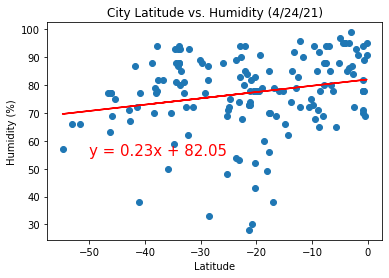

The r^2 value is 0.05039325847645719


In [135]:
# Store x and y variables
weather_data_south = weather_data[weather_data["Lat"] < 0]
x_axis = weather_data_south["Lat"]
y_axis = weather_data_south["Humidity"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,55), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and humidity in the southern hemisphere. The r^2 value displays this.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

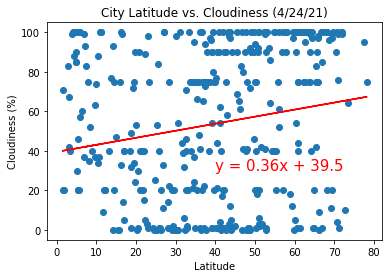

The r^2 value is 0.0323358081234542


In [137]:
# Store x and y variables
weather_data_north = weather_data[weather_data["Lat"] > 0]
x_axis = weather_data_north["Lat"]
y_axis = weather_data_north["Cloudiness"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (40,30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and cloudiness in the northern hemisphere. The r^2 value displays this.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

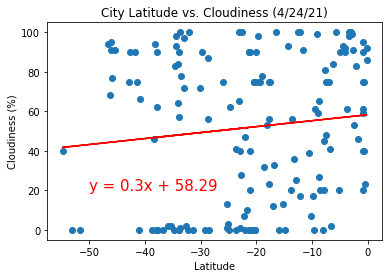

The r^2 value is 0.012709959530713332


In [139]:
# Store x and y variables
weather_data_south = weather_data[weather_data["Lat"] < 0]
x_axis = weather_data_south["Lat"]
y_axis = weather_data_south["Cloudiness"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and cloudiness in the southern hemisphere. The r^2 value displays this.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

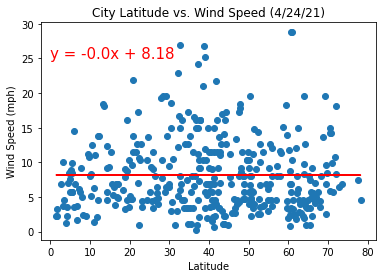

The r^2 value is 1.6158232448580803e-06


In [141]:
# Store x and y variables
weather_data_north = weather_data[weather_data["Lat"] > 0]
x_axis = weather_data_north["Lat"]
y_axis = weather_data_north["Wind Speed"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (0,25), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and wind speed in the northern hemisphere. The r^2 value displays this.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

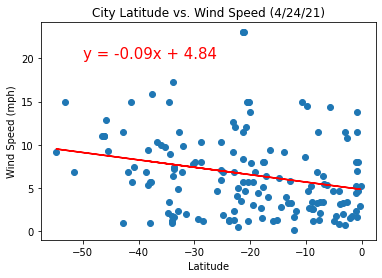

The r^2 value is 0.05926045708997372


In [143]:
# Store x and y variables
weather_data_south = weather_data[weather_data["Lat"] < 0]
x_axis = weather_data_south["Lat"]
y_axis = weather_data_south["Wind Speed"]

# Plot the line equation on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/24/21)")
plt.scatter(x_axis, y_axis)
plt.show()

# Print r-value
r_square = rvalue*rvalue
print(f'The r^2 value is {r_square}')

In [ ]:
# The plot above shows that there is a weak correlation between latitude and wind speed in the southern hemisphere. The r^2 value displays this.